In [1]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister, execute, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator as AerEstimator

In [2]:
from sandbox_assets import iniQC

In [113]:
def observable(obs, qc, basis_gates, seed = 1, opt_level = 0):

    c_observable_gate = (obs.to_gate()).control()

    temp_circ = QuantumCircuit(obs.num_qubits+1)
    temp_circ.append(c_observable_gate, [*range(0, obs.num_qubits+1)])

    temp_circ_t = transpile(temp_circ, basis_gates = basis_gates, optimization_level = opt_level, seed_transpiler = seed)

    qc = qc.compose(temp_circ_t, [qc.ancillas[0]] + qc.qregs[1][:])

    return(qc)


In [115]:
circuit = iniQC(2,5,1)

obs = QuantumCircuit(5)
obs.x(range(5))

[[circuit.ancillas[0]]+circuit.qregs[1][:]]
huhu = observable(obs = obs, qc = circuit, basis_gates = ['cx'])

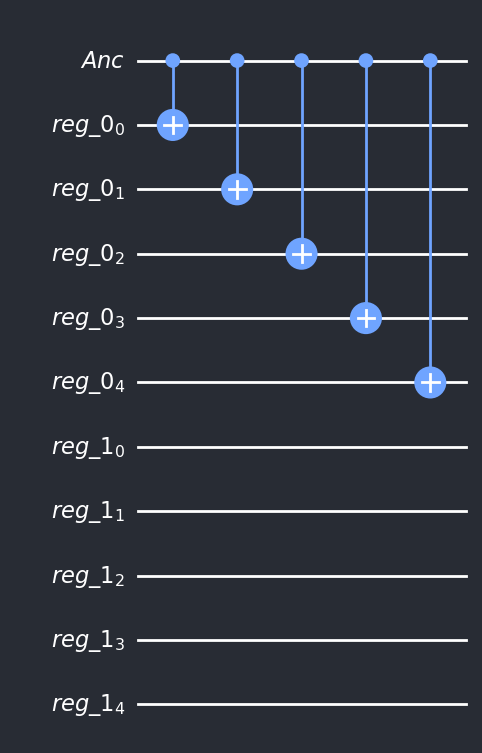

In [117]:
huhu.draw()

In [104]:
def iniState(initial_state, qc, basis_gates, seed = 1, opt_level = 0):

    initial_state_gate = initial_state.to_gate()

    temp_circ = QuantumCircuit(initial_state.num_qubits)
    temp_circ.append(initial_state_gate, [*range(0, initial_state.num_qubits)])

    temp_circ_t = transpile(temp_circ, basis_gates = basis_gates, optimization_level = opt_level, seed_transpiler = seed)

    for register in qc.qregs[:0:-1]:
        qc = qc.compose(temp_circ_t, register)
    
    return(qc)



In [105]:
circuit = iniQC(2,5,1)

initial_state = QuantumCircuit(5)
initial_state.x(range(5))

asd = iniState(initial_state = initial_state, qc = circuit, basis_gates = ['x'])

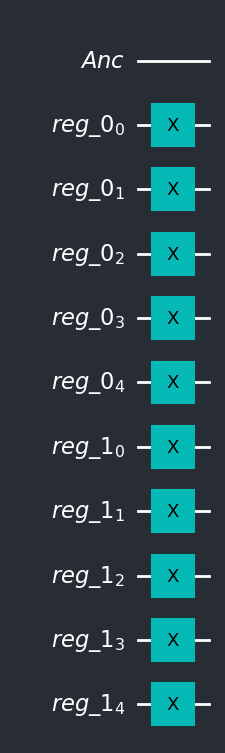

In [106]:
asd.draw()

In [121]:
from qiskit.circuit.library import CSwapGate

In [137]:
def derangement(qc, basis_gates, seed = 1, opt_level = 0):
    
    ancilla_qubit = qc.ancillas[0]
    registers = qc.qregs[1:]
    numQubits = registers[0].size

    temp_circ = qc.copy_empty_like()

    for i in reversed(range(1, len(registers))):
        for j in reversed(range(numQubits)):
            temp_circ.cswap(ancilla_qubit, registers[i][j], registers[i-1][j])
    
    temp_circ_t = transpile(temp_circ, basis_gates = basis_gates, optimization_level = opt_level, seed_transpiler = seed)

    qc = qc.compose(temp_circ_t)

    return(qc)

/Users/noszi/Developer/python_env/env_Quantum/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/noszi/Developer/python_env/env_Quantum/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


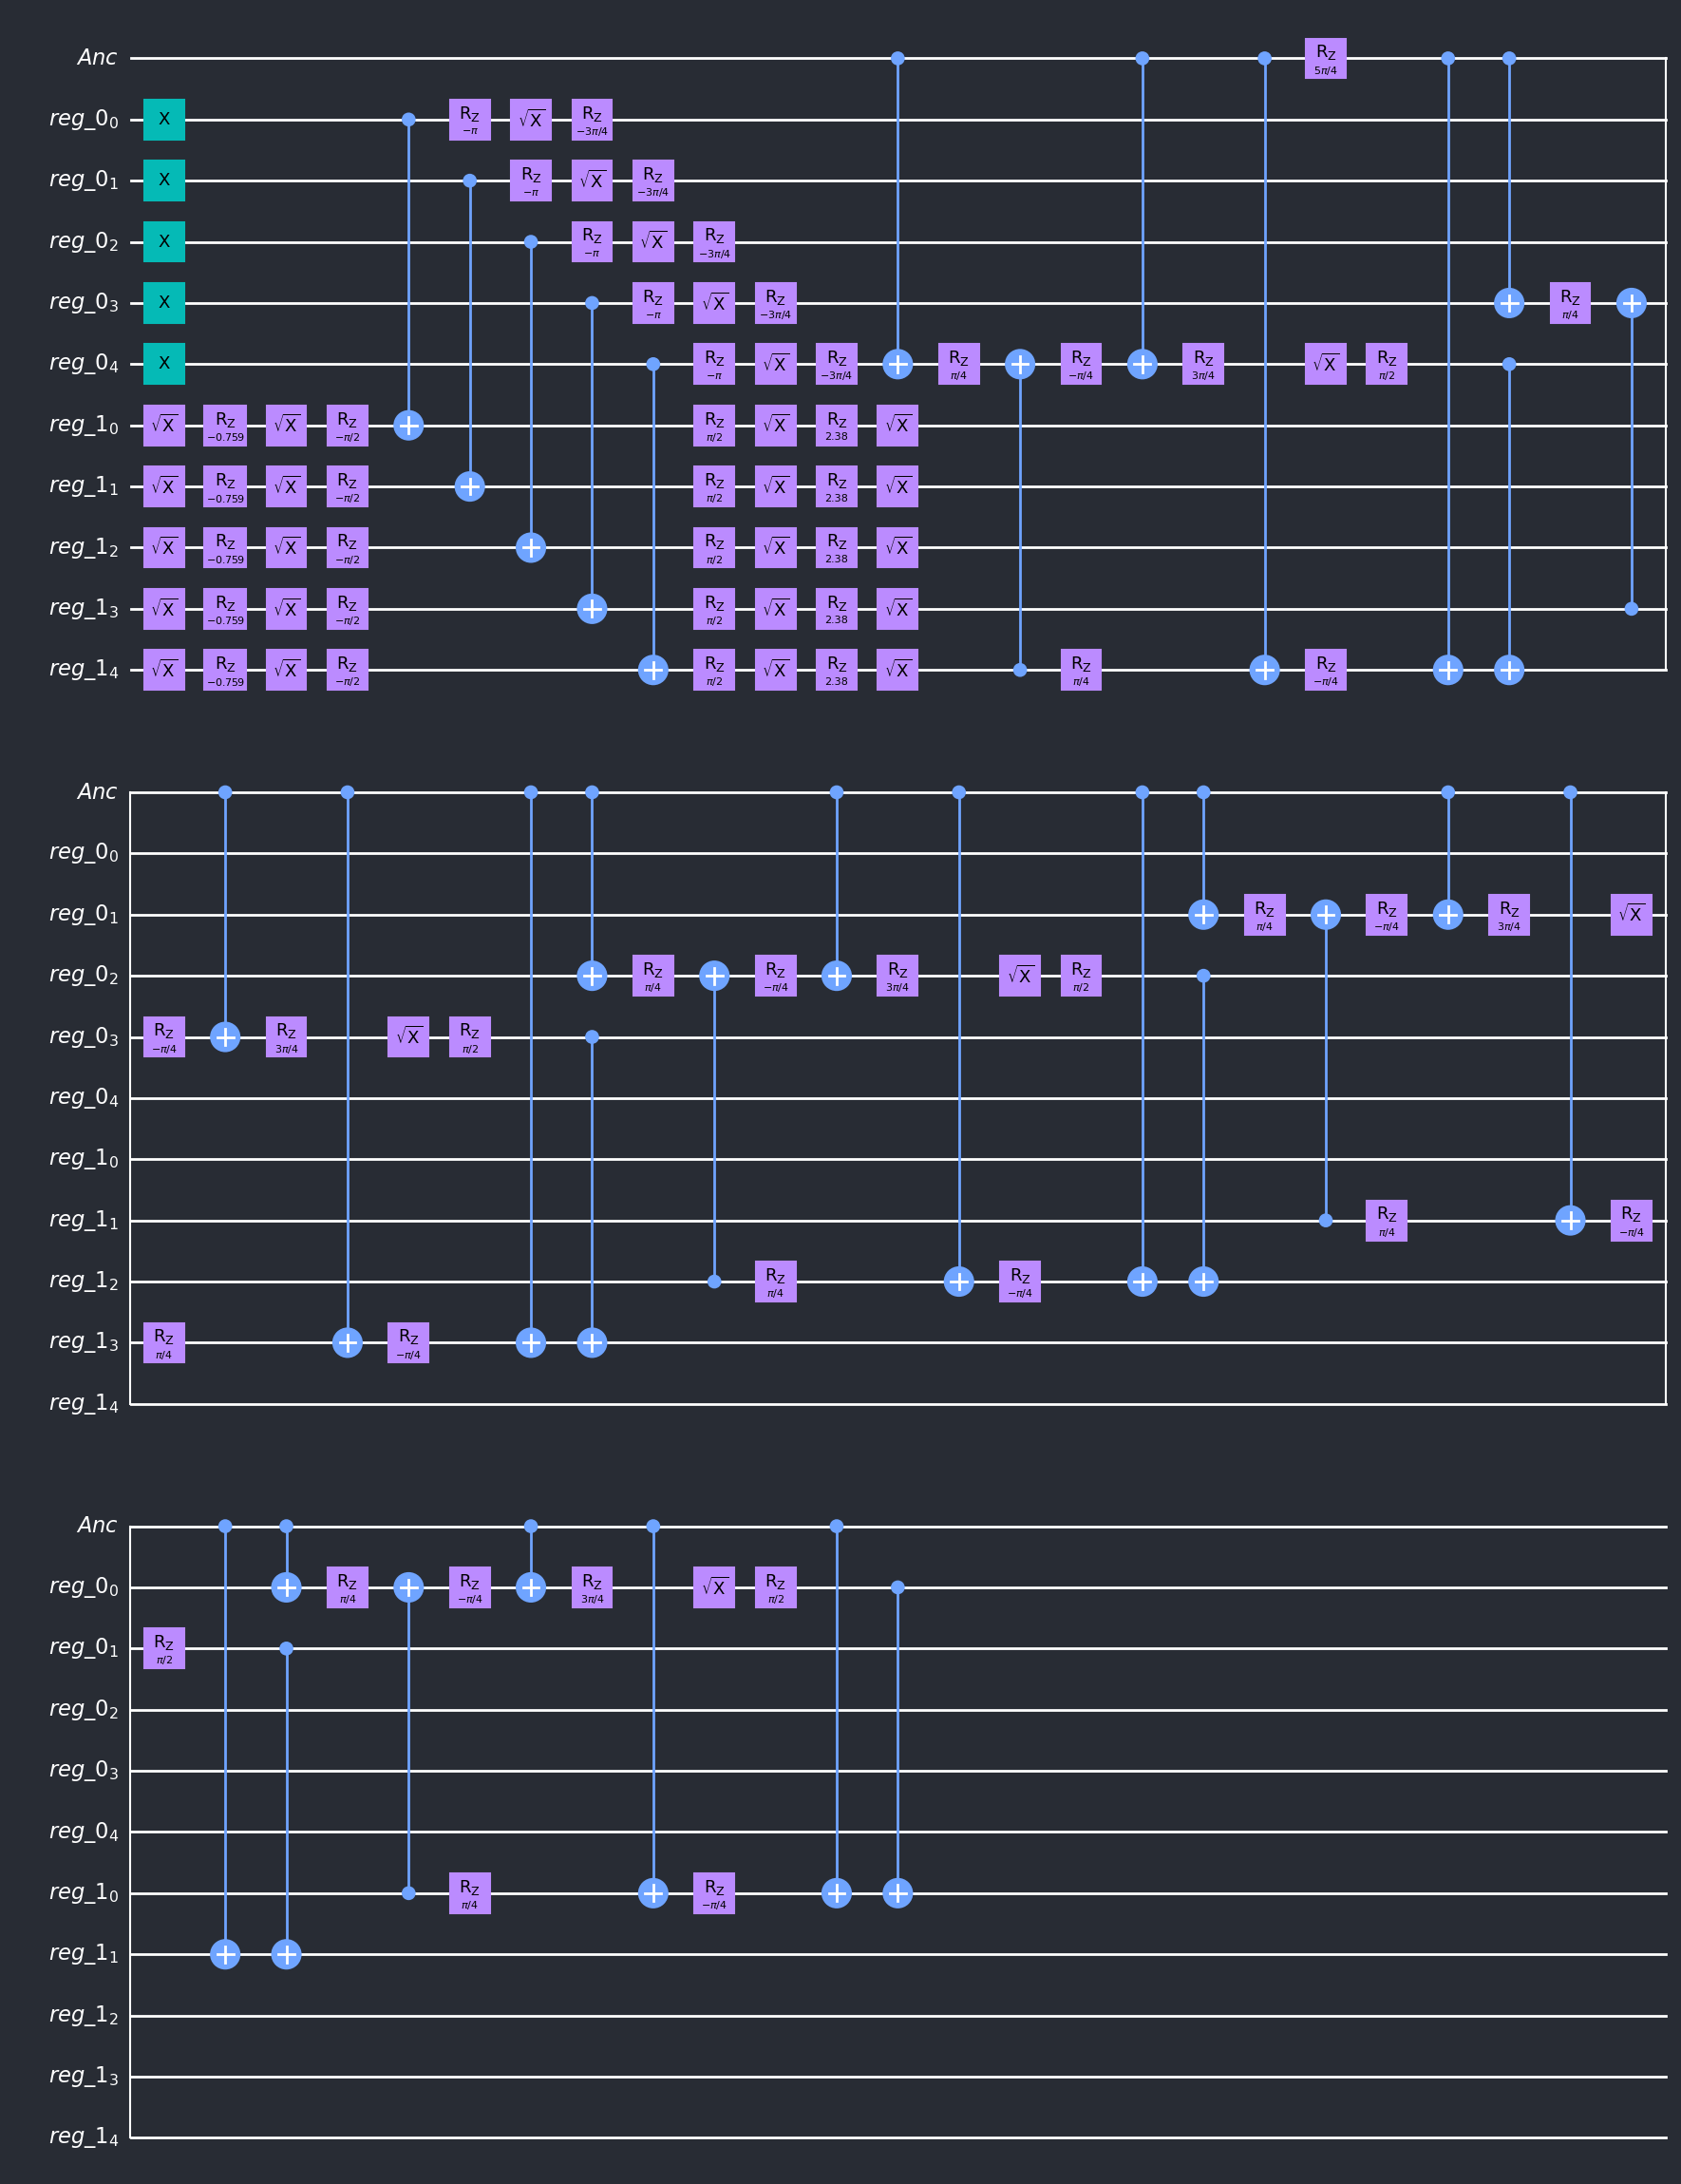

In [140]:
circuit = iniQC(2,5,1)
hueue = derangement(circuit, basis_gates = ['cx', 'rz', 'id', 'x', 'sx'], opt_level = 3)
hueue.draw()

In [149]:
def circ_assembler(copies, qubits, ancilla_qubits, initial_state, obs, basis_gates, der_op = True, opt_level = 0, seed = 1):

    qc = iniQC(copies, qubits, ancilla_qubits)
    qc = iniState(initial_state = initial_state, qc = qc, basis_gates = basis_gates, seed = seed, opt_level = opt_level)
    qc.barrier()
    qc.h(0)
    if der_op == True:
        qc = derangement(qc = qc, basis_gates = basis_gates, seed = seed, opt_level = opt_level)
        qc.barrier()
    if obs != False: 
        qc = observable(obs = obs, qc = qc, basis_gates = basis_gates, seed = seed, opt_level = opt_level)
    qc.h(0)

    return(qc)

In [154]:
pupu = circ_assembler(copies = 2, qubits = 5, ancilla_qubits = 1, initial_state = initial_state, obs = obs, basis_gates = ['x', 'cx','sx', 'rz', 'id'], der_op = True, opt_level = 3, seed = 1)

/Users/noszi/Developer/python_env/env_Quantum/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/noszi/Developer/python_env/env_Quantum/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


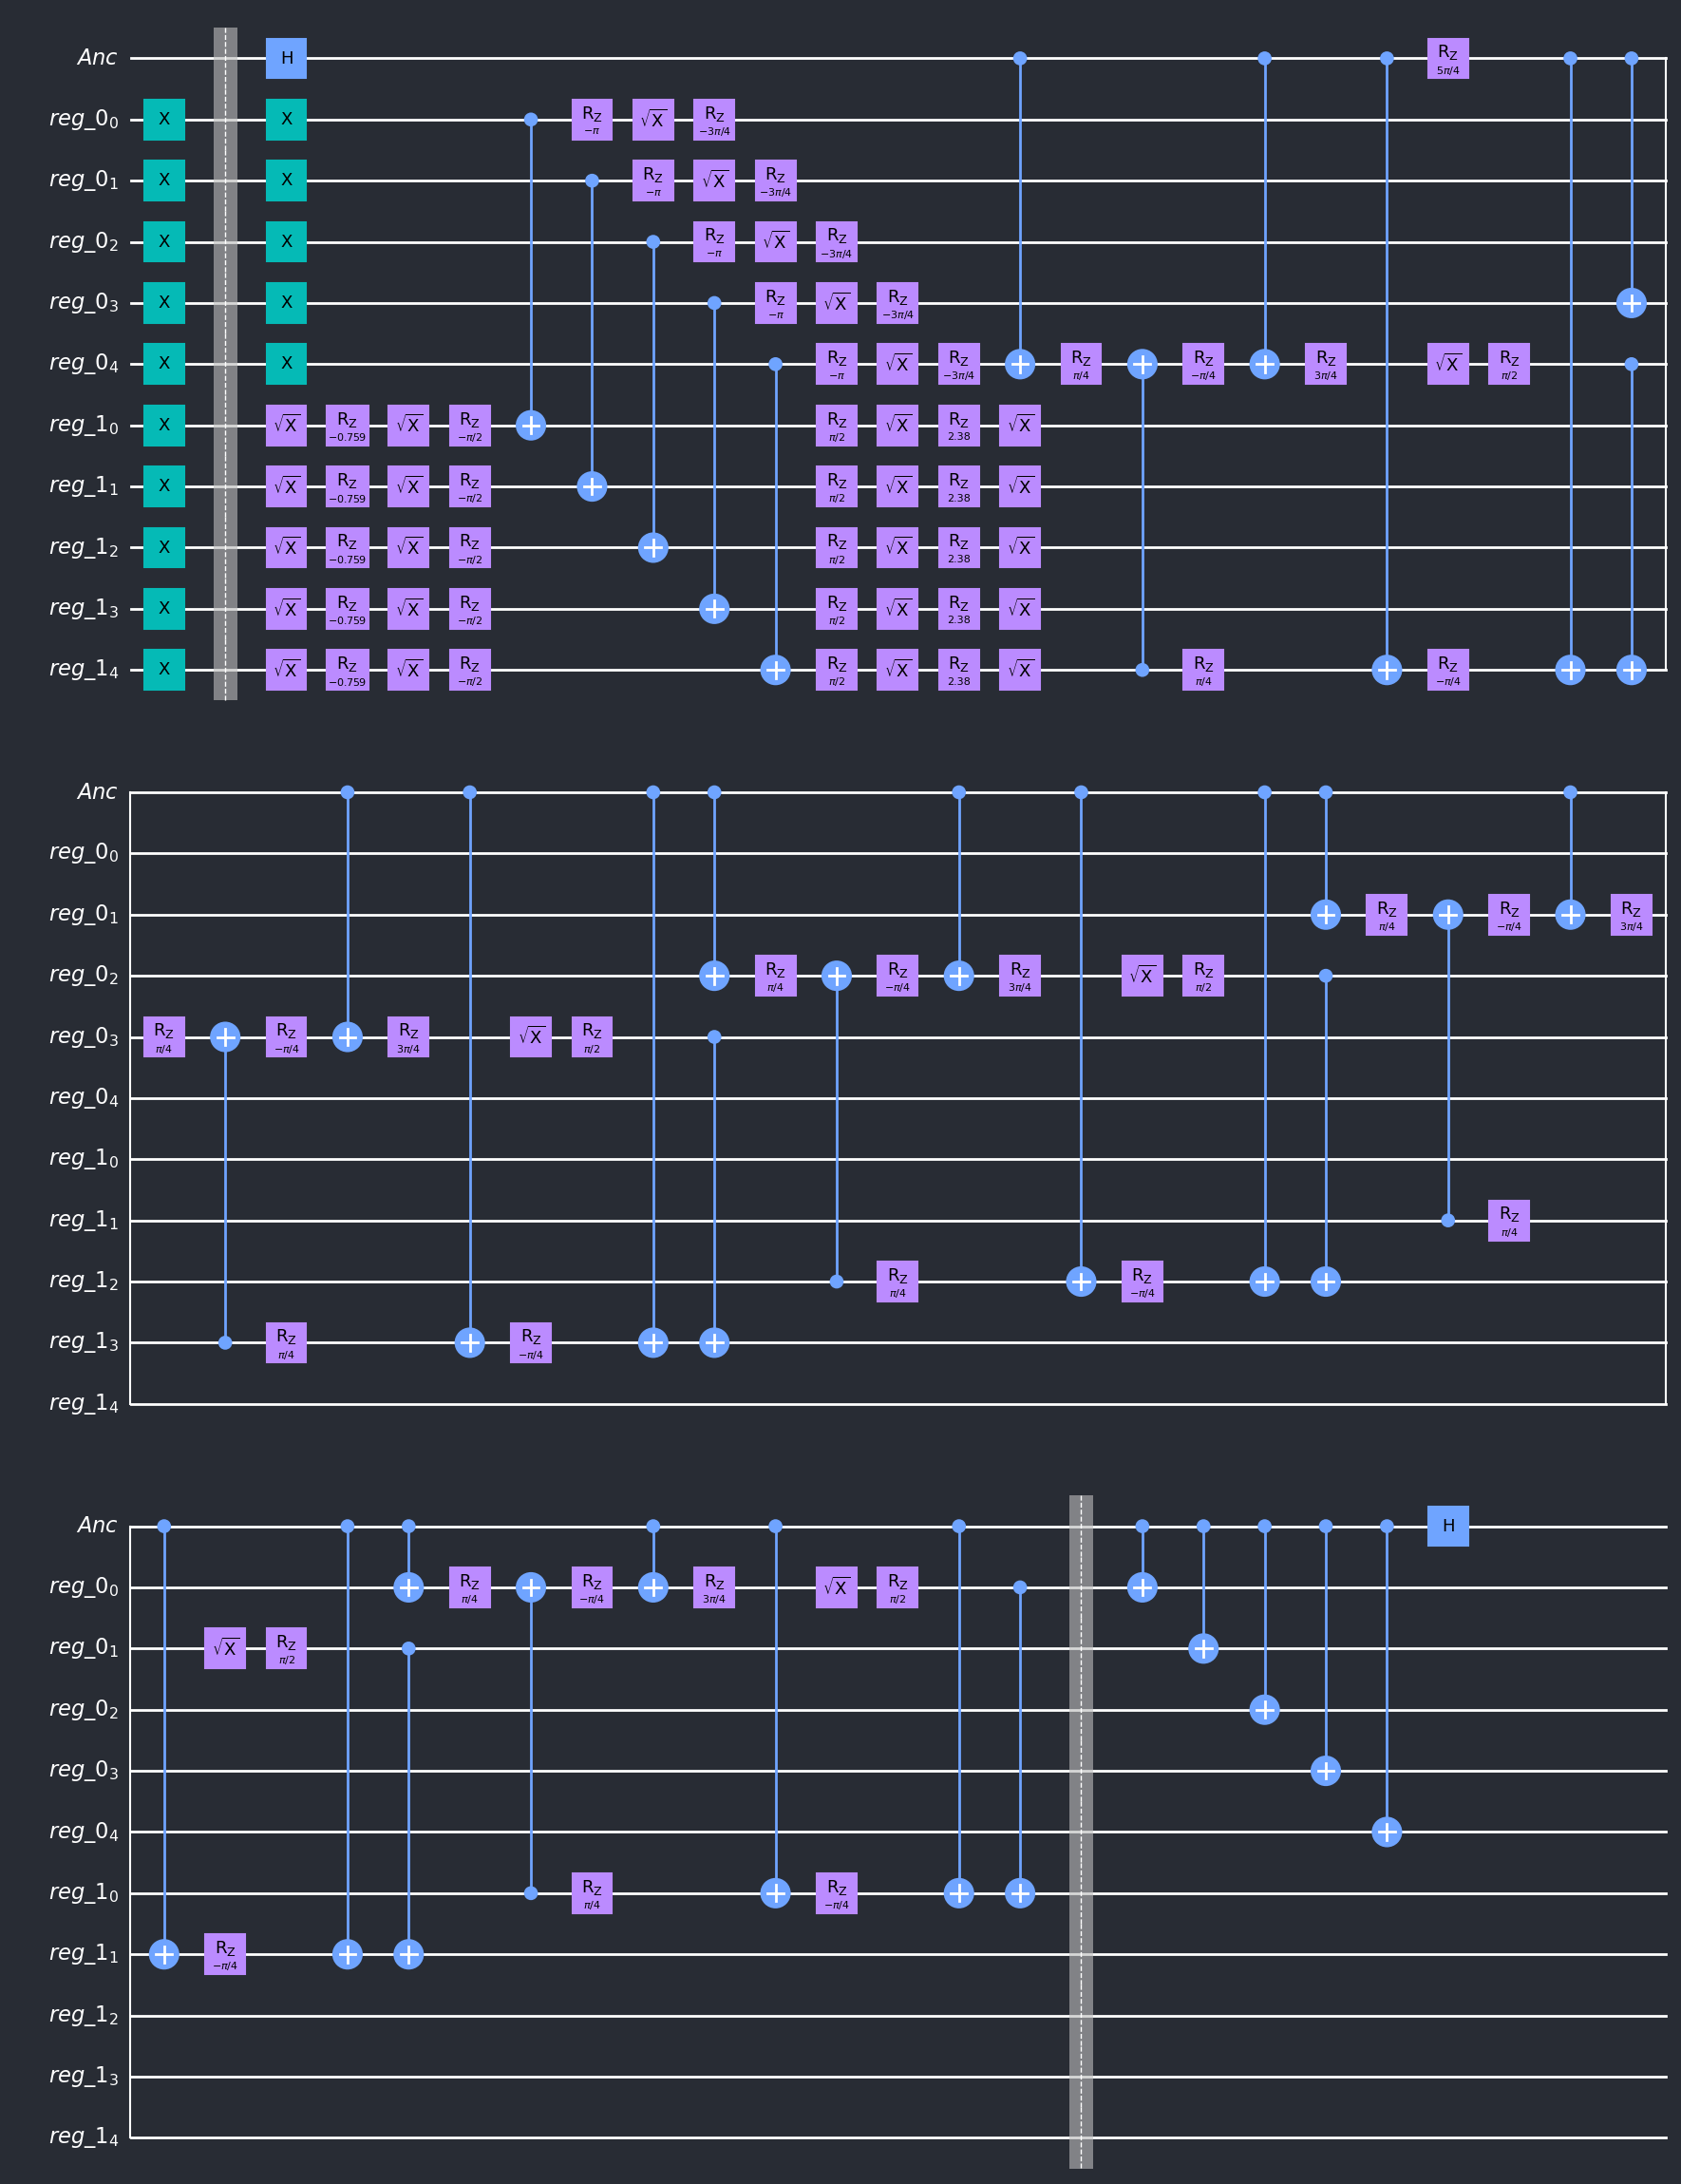

In [155]:
pupu.draw()

In [156]:
from qiskit.extensions import CXGate

In [157]:
costum_cx_gate = CXGate(label = "costum_cx")

In [164]:
def GHZ_new(qc):

    registers = qc.qregs[:]
    numQubits = registers[0].size

    for reg in registers:
        qc.h(reg[0])

        for qubit in range(numQubits-1):
            qc.append(costum_cx_gate, (reg[qubit], reg[qubit+1])) # <-- redifining happens here!

In [181]:
initial_state = QuantumCircuit(5)
GHZ_new(initial_state)
initial_state.y(0)


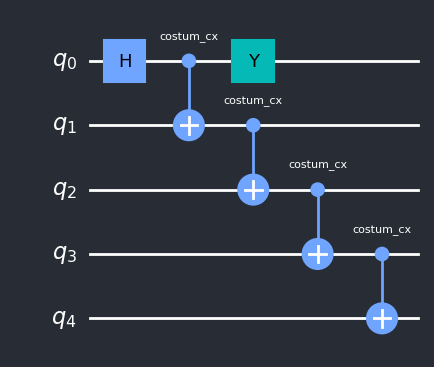

In [182]:
initial_state.draw()

In [190]:
piupiu = circ_assembler(copies = 2, qubits = 5, ancilla_qubits = 1, initial_state = initial_state, obs = obs, basis_gates = ['x','y','cswap','cx', 'h'], der_op = True, opt_level = 3, seed = 1)

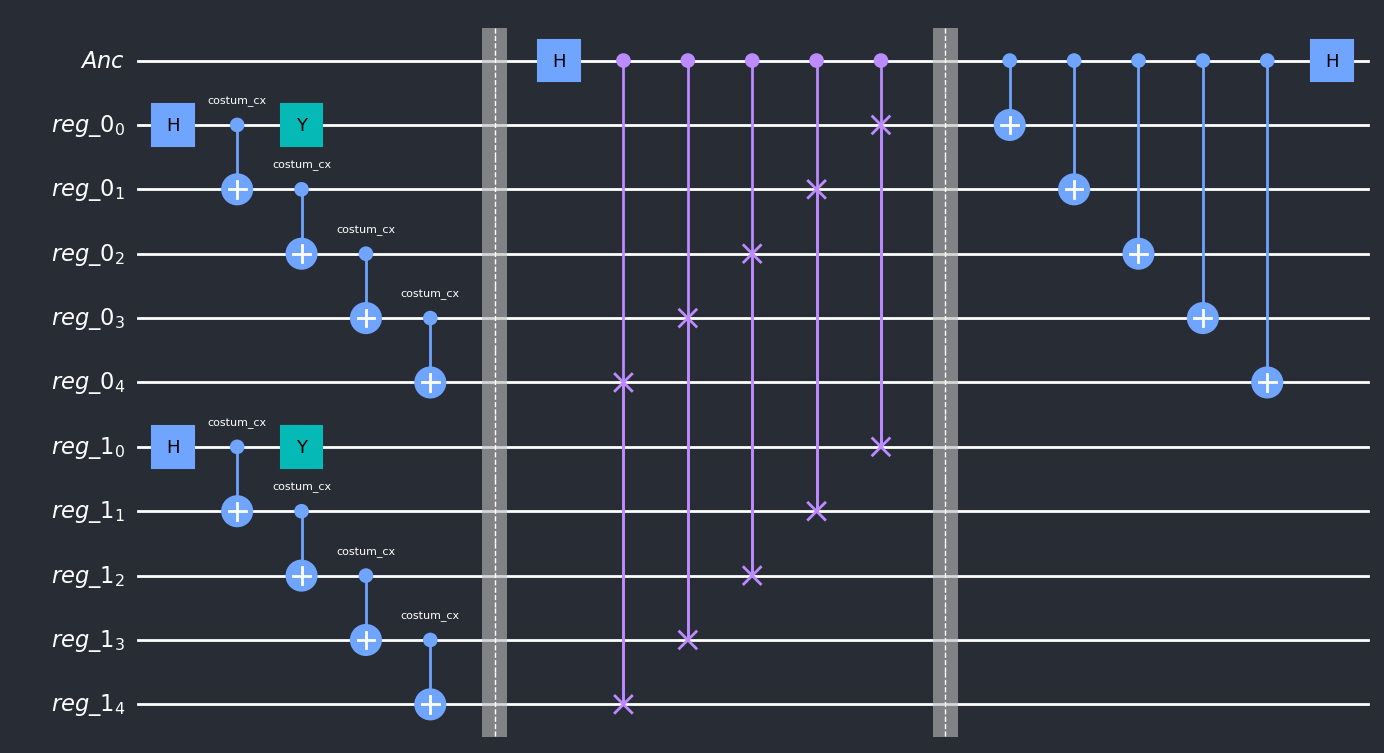

In [191]:
piupiu.draw()